In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/cost_of_living.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import plotnine as pn
# input cost of living data

In [ ]:
#load dataframe
#header=[1] needed to shift frame up
df = pd.read_csv('/content/cost_of_living.csv',header=[0])

In [ ]:
df

,Countries,"Cost of living, 2017",Global rank,Available data
0,Bermuda,225.86,1,2017 - 2017
1,Iceland,209.10,2,2017 - 2017
2,Switzerland,197.89,3,2017 - 2017
3,Norway,186.52,4,2017 - 2017
4,Denmark,171.78,5,2017 - 2017
...,...,...,...,...
162,Azerbaijan,40.56,163,2017 - 2017
163,Kyrgyzstan,40.38,164,2017 - 2017
164,Sudan,38.29,165,2017 - 2017
165,Ukraine,37.76,166,2017 - 2017


In [ ]:
#this will take the mean of each column (this computation ignores the currently present nan values (not a number)), then round, and return a dataframe indexed by the columns of the original dataframe.
#error because country is not numerical
df.mean().round()

<ipython-input-4-02b1adee299e>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


Cost of living, 2017    83.0
Global rank             84.0
dtype: float64

In [ ]:
df.describe()

,"Cost of living, 2017",Global rank
count,167.000000,167.00000
mean,82.922216,84.00000
std,38.385231,48.35287
min,27.370000,1.00000
25%,55.035000,42.50000
50%,70.080000,84.00000
75%,102.590000,125.50000
max,225.860000,167.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Countries             167 non-null    object 
 1   Cost of living, 2017  167 non-null    float64
 2   Global rank           167 non-null    int64  
 3   Available data        167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [ ]:
df.shape

(167, 4)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import plotnine as pn
import matplotlib.pyplot as plt
import graphviz
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn import metrics

In [ ]:
#data = pd.read_csv("/content/Animal Dataset.csv", error_bad_lines=False)#Extracting independent variable:
x= df.iloc[:,:-1].values
  #To extract an independent variable, we will use iloc[ ] method of Pandas library. It is used to extract the required rows and columns from the dataset.
print(x)

[['Bermuda' 225.86 1]
 ['Iceland' 209.1 2]
 ['Switzerland' 197.89 3]
 ['Norway' 186.52 4]
 ['Denmark' 171.78 5]
 ['Barbados' 169.9 6]
 ['Australia' 168.02 7]
 ['Israel' 167.52 8]
 ['New Zealand' 160.18 9]
 ['Bahamas' 158.09 10]
 ['Ireland' 157.19 11]
 ['Luxembourg' 156.4 12]
 ['Sweden' 155.01 13]
 ['Finland' 151.13 14]
 ['Japan' 144.44 15]
 ['UK' 144.03 16]
 ['USA' 143.34 17]
 ['Canada' 142.12 18]
 ['Netherlands' 137.57 19]
 ['Belgium' 136.89 20]
 ['France' 135.27 21]
 ['Austria' 134.56 22]
 ['Ant.& Barb.' 131.03 23]
 ['Germany' 127.47 24]
 ['Italy' 124.24 25]
 ['Uruguay' 124.24 26]
 ['South Korea' 123.53 27]
 ['Aruba' 118.56 28]
 ['Hong Kong' 114.81 29]
 ['Spain' 113.82 30]
 ['Qatar' 113.61 31]
 ['Montserrat' 112.43 32]
 ['Singapore' 112.16 33]
 ['UA Emirates' 110.65 34]
 ['Saint Lucia' 110.38 35]
 ['Cyprus' 108.2 36]
 ['Portugal' 106.46 37]
 ['Belize' 105.86 38]
 ['Chile' 105.82 39]
 ['Greece' 104.66 40]
 ['Brazil' 104.54 41]
 ['Slovenia' 103.47 42]
 ['Malta' 101.71 43]
 ['Dominica' 

In [ ]:
#Extracting dependent variable:
#data = pd.read_csv("/content/Animal Dataset.csv", error_bad_lines=False)
y= df.iloc[:,3].values
# extract dependent variables, again, we will use Pandas .iloc[] method.
print (y)

['2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017

In [ ]:
D1 = {'Bermuda':1,'Iceland':2, 'Switzerland':3, 'Norway':4, 'Denmark':5}

In [ ]:
df['Countries'] = df['Countries'].map(D1)

In [ ]:
#Handling Missing data:
#handling missing data (Replacing missing data with the mean value)
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)
#from sklearn.preprocessing import Imputer


In [ ]:


#Fitting imputer object to the independent variables x.
imputerimputer= imputer.fit(x[:, 1:3])
#Replacing missing data with the calculated mean value
x[:, 1:3]= imputer.transform(x[:, 1:3])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
#Feature Scaling of datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
sc= OneHotEncoder(handle_unknown='ignore')
st_x= StandardScaler()
#sc = StandardScaler(with_mean=False)
x_train_sc = sc.fit(x_train)
x_train =x_train_sc.transform(x_train)
x_test = x_train_sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

knn_train_acc = accuracy_score(y_train, knn.predict(x_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 1.0
Test Accuracy of KNN Model is 1.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[56]])

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 2017 - 2017       1.00      1.00      1.00        56

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 1.0


In [ ]:
confusion_matrix(y_test, y_pred)


array([[56]])

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 2017 - 2017       1.00      1.00      1.00        56

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [ ]:
#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(x_train, y_train)

y_pred = rand_clf.predict(x_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(x_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 1.0
Test Accuracy of Random Forest Model is 1.0


In [ ]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[56]])

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 2017 - 2017       1.00      1.00      1.00        56

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [ ]:
models = [ 'KNN',  'Decision Tree', 'Random Forest']
scores = [ knn_test_acc, dtc_test_acc, rand_clf_test_acc, ]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,KNN,1.0
1,Decision Tree,1.0
2,Random Forest,1.0


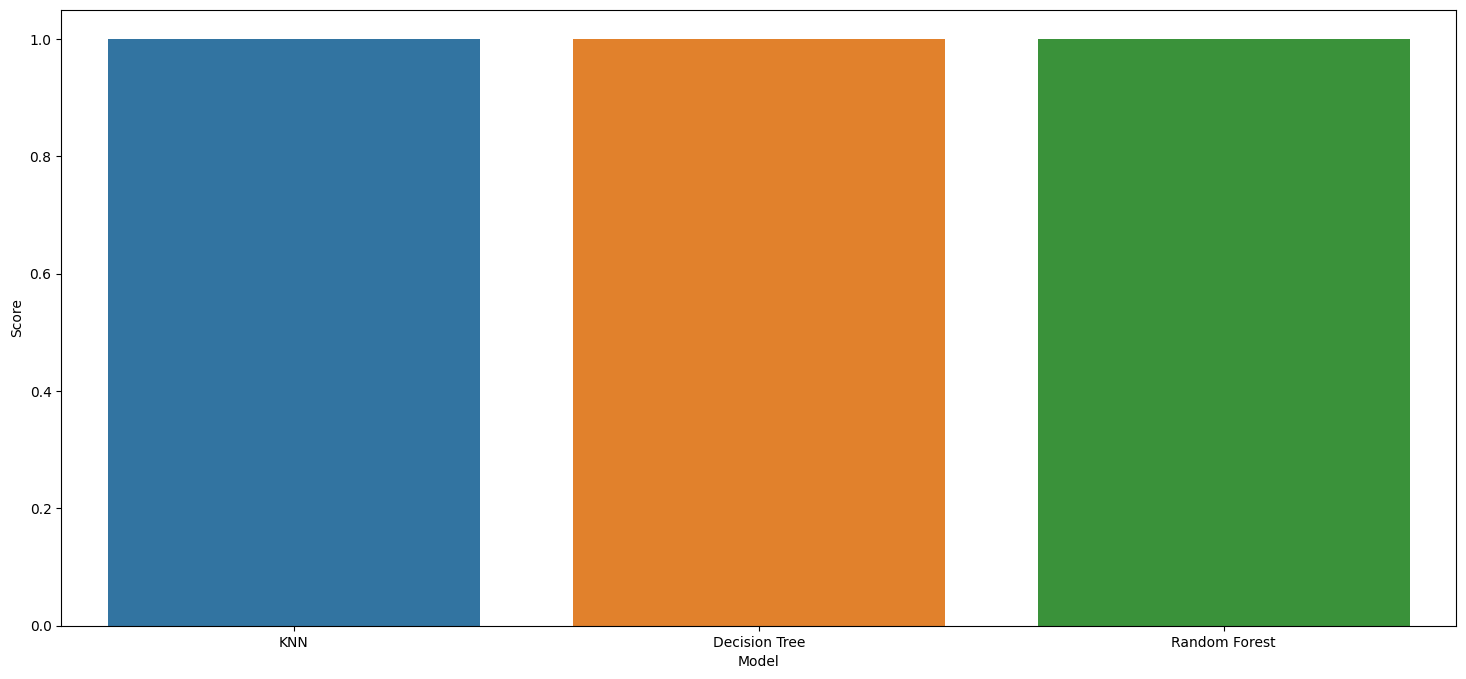

In [ ]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()